In [1]:
# Importing Libraries

# Used for Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Used for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')

# Used for NLP
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Used for ML/Deep Learning Algorithms
from tensorflow.keras.layers import Embedding,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM,Bidirectional,GRU,MaxPooling1D,Conv1D
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report,accuracy_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/var/folders/8m/8rtny1wx06z5xjfqylkhqg1c0000gn/T/ipykernel_33913/2320429441.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')
2024-01-30 20:02:52.342756: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


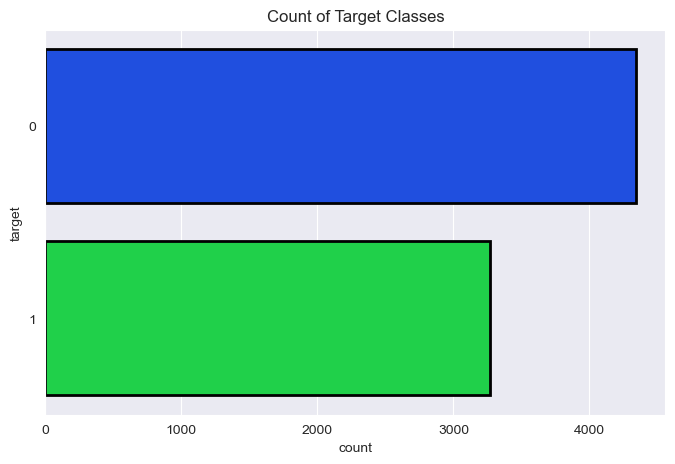

In [3]:
# Visualizing the target classes
plt.figure(figsize=(8,5))
plt.title("Count of Target Classes")
sns.countplot(y=train["target"],linewidth=2,
                   edgecolor='black')

plt.show()

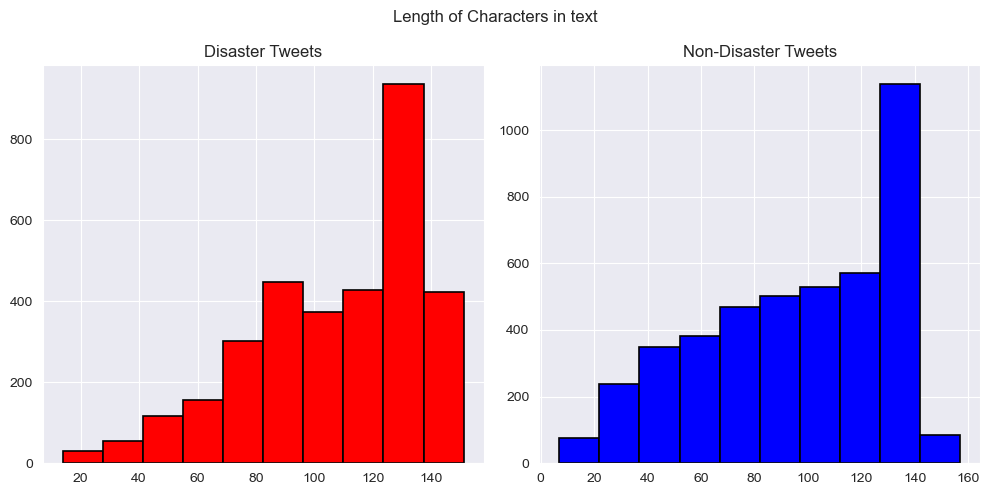

In [4]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
char_len_dis = train[train['target']==1]['text'].str.len()
ax1.hist(char_len_dis,color='red',edgecolor='black', linewidth=1.2)
ax1.set_title('Disaster Tweets')
char_len_ndis = train[train['target']==0]['text'].str.len()
ax2.hist(char_len_ndis,color='blue',edgecolor='black', linewidth=1.2)
ax2.set_title('Non-Disaster Tweets')
plt.suptitle("Length of Characters in text")
plt.tight_layout()
plt.show()

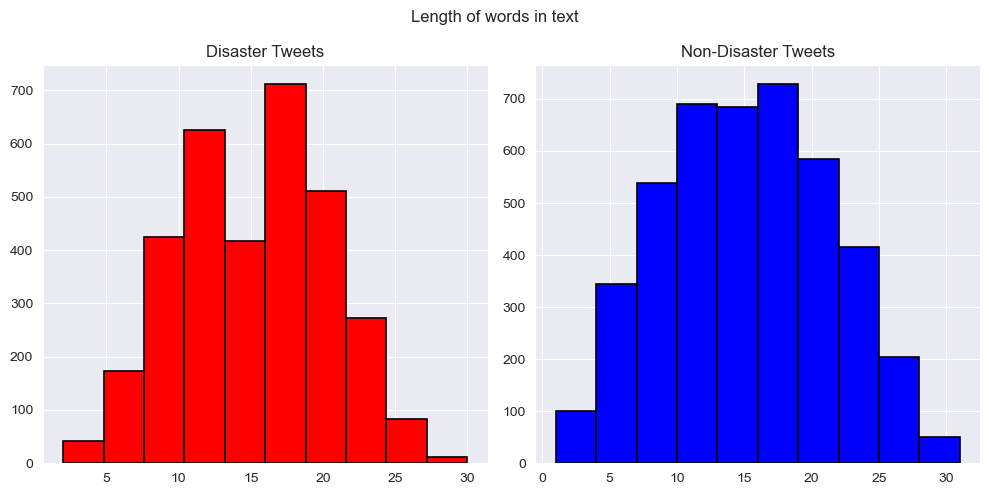

In [5]:
# Analysing number of words in text.

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
char_len_dis = train[train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(char_len_dis,color='red',edgecolor='black', linewidth=1.2)
ax1.set_title('Disaster Tweets')
char_len_ndis = train[train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(char_len_ndis,color='blue',edgecolor='black', linewidth=1.2)
ax2.set_title('Non-Disaster Tweets')
plt.suptitle("Length of words in text")
plt.tight_layout()
plt.show()

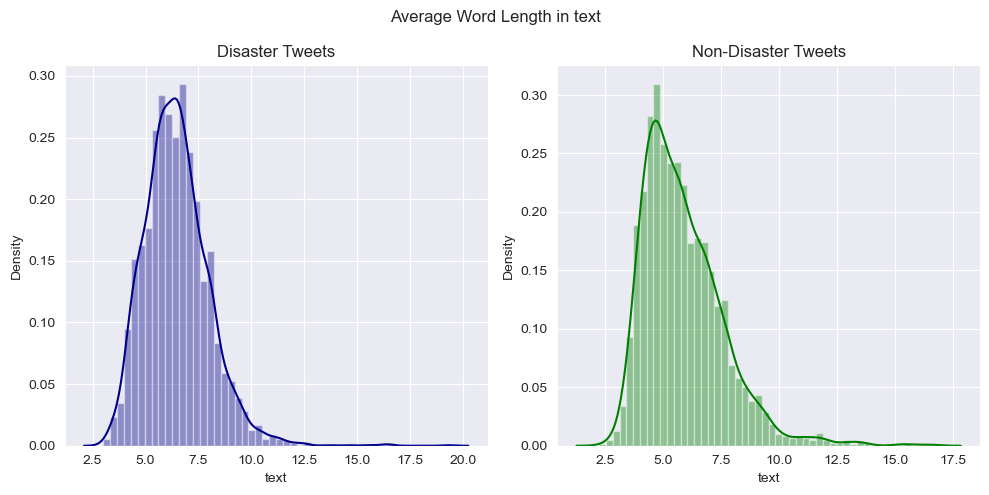

In [6]:
# Analysing average word length in text.

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
char_len_dis = train[train['target']==1]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(char_len_dis.map(lambda x: np.mean(x)),ax=ax1,color='darkblue')
ax1.set_title('Disaster Tweets')
char_len_ndis = train[train['target']==0]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(char_len_ndis.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Non-Disaster Tweets')
plt.suptitle("Average Word Length in text")
plt.tight_layout()
plt.show()

In [7]:
# Creating sample corpus for further analysis.
def create_corpus(target):
    corpus = []
    for x in train[train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

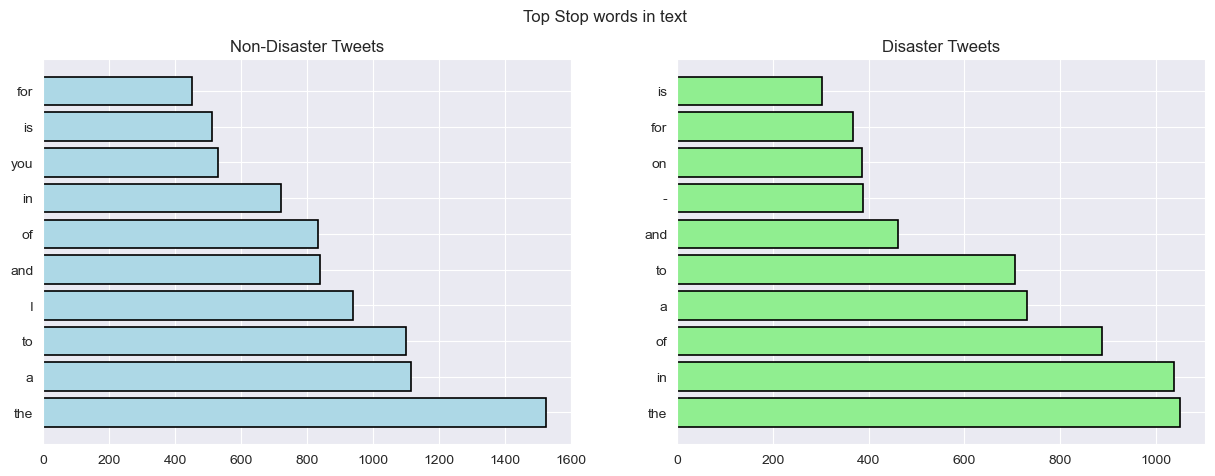

In [8]:
# Analysing top stop words in text.
from collections import defaultdict

def analyze_stopwords(data,func,target):
    values_list = []
    for labels in range(0,len(target)):
        dic = defaultdict(int)
        corpus = func(target[labels])
        for word in corpus:
            dic[word]+=1
        top = sorted(dic.items(),key = lambda x: x[1],reverse=True)[:10]
        x_items,y_values = zip(*top)
        values_list.append(x_items)
        values_list.append(y_values)
    
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    ax1.barh(values_list[0],values_list[1],color="lightblue",edgecolor='black', linewidth=1.2)
    ax1.set_title("Non-Disaster Tweets")
    
    ax2.barh(values_list[2],values_list[3],color="lightgreen",edgecolor='black', linewidth=1.2)
    ax2.set_title("Disaster Tweets")
            
    plt.suptitle("Top Stop words in text")
    plt.show()

analyze_stopwords(train,create_corpus,[0,1])

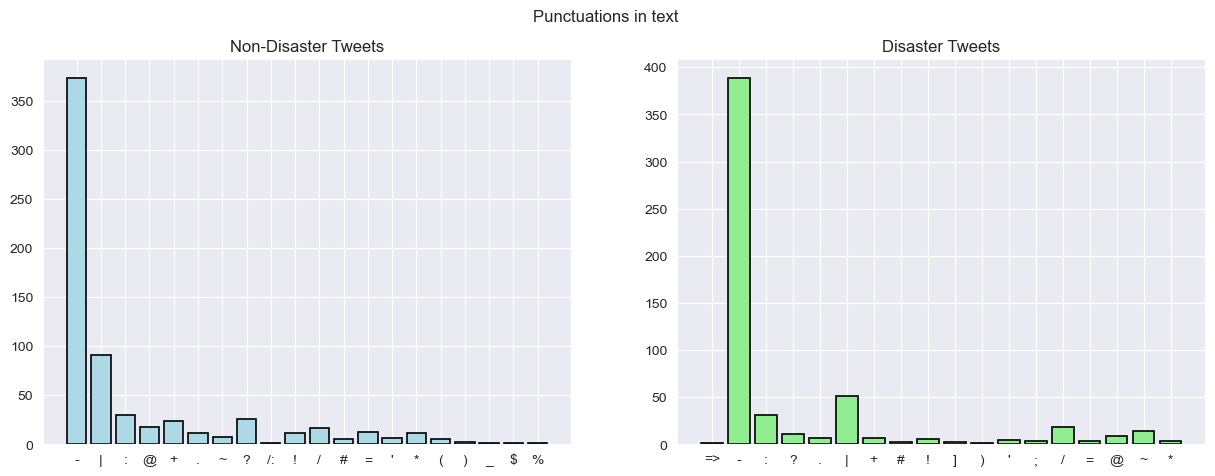

In [9]:
# Anaysing Punctuations
import string

def analyze_punctuation(data,func,target):
    values_list = []
    special = string.punctuation
    for labels in range(0,len(target)):
        dic = defaultdict(int)
        corpus = func(target[labels])
        for i in corpus:
            if i in special:
                dic[i]+=1
        x_items,y_values = zip(*dic.items())
        values_list.append(x_items)
        values_list.append(y_values)
    
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    ax1.bar(values_list[0],values_list[1],color="lightblue",edgecolor='black', linewidth=1.2)
    ax1.set_title("Non-Disaster Tweets")
    
    ax2.bar(values_list[2],values_list[3],color="lightgreen",edgecolor='black', linewidth=1.2)
    ax2.set_title("Disaster Tweets")
            
    plt.suptitle("Punctuations in text")
    plt.show()

analyze_punctuation(train,create_corpus,[0,1])

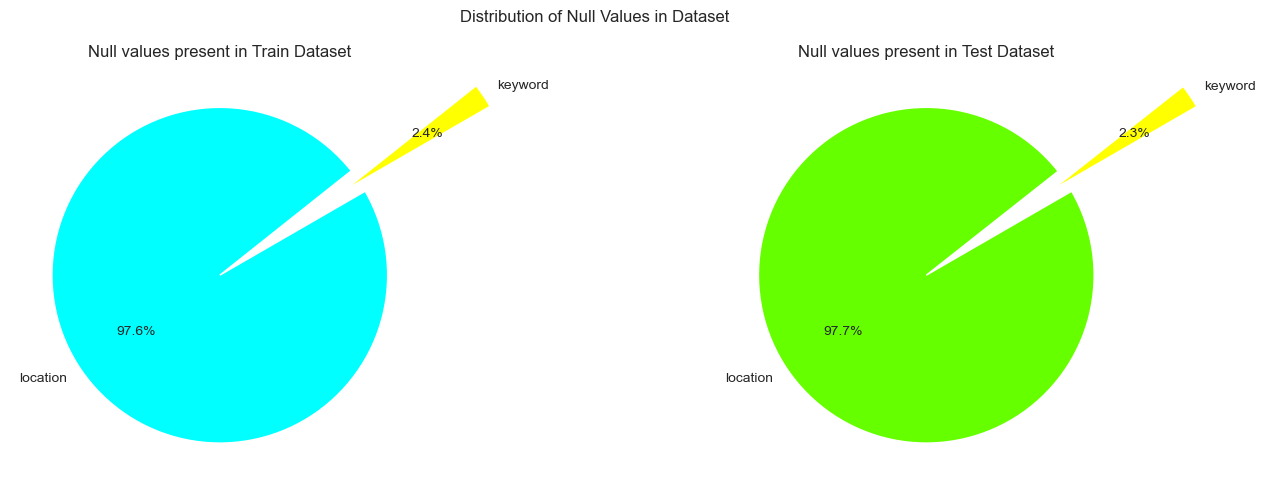

In [10]:
# Checking Null values
missing_train = train.isnull().sum()  
missing_test = test.isnull().sum()  
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
missing_train = missing_train[missing_train>0].sort_values()
ax1.pie(missing_train,autopct='%1.1f%%',startangle=30,explode=[0.9,0],labels=["keyword","location"],colors=['yellow','cyan'])
ax1.set_title("Null values present in Train Dataset")

missing_test = missing_test[missing_test>0].sort_values()
ax2.pie(missing_test,autopct='%1.1f%%',startangle=30,explode=[0.9,0],labels=["keyword","location"],colors=['yellow','#66ff00'])
ax2.set_title("Null values present in Test Dataset")
plt.suptitle("Distribution of Null Values in Dataset")
plt.tight_layout()
plt.show()

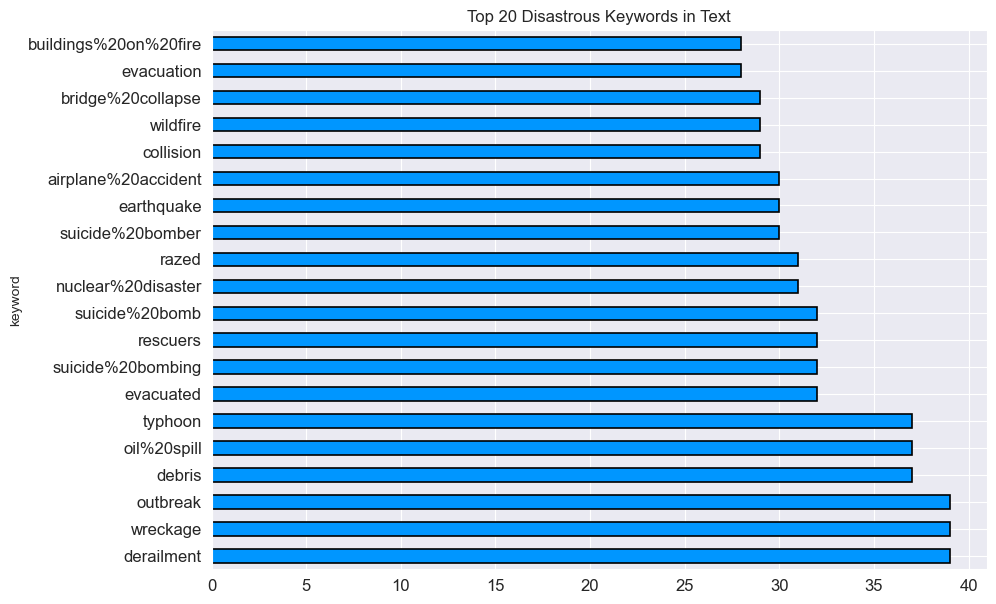

In [11]:
# Analysing Top 20  disastrous KeyWords in text .
plt.figure(figsize=(10,7))
train[train['target']==1]['keyword'].value_counts()[:20].plot(kind='barh', fontsize=12,title='Top 20 Disastrous Keywords in Text', color='#0096FF',edgecolor='black', linewidth=1.2)
plt.show()

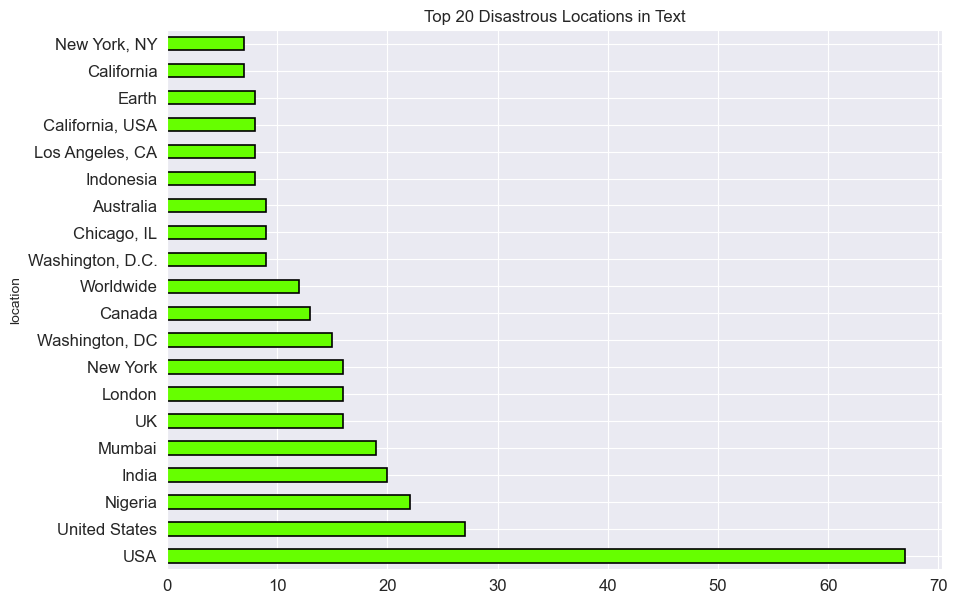

In [12]:
# Analysing Top 20 disastrous Locations in text.
plt.figure(figsize=(10,7))
train[train["target"]==1]["location"].value_counts()[:20].plot(kind='barh',fontsize=12, title='Top 20 Disastrous Locations in Text', color='#66ff00',edgecolor='black', linewidth=1.2)
plt.show()

In [13]:
# Seperating independent and dependent features
X = train.drop(columns=["target"],axis=1)
y = train["target"]

In [14]:
# Perfoming data cleaning

messages_train = X.copy()
messages_test  = test.copy()

ps = PorterStemmer()
wl = WordNetLemmatizer()
def preprocess_data(data):
    '''
    Input: Data to be cleaned.
    Output: Cleaned Data.
    
    '''
    review =re.sub(r'https?://\S+|www\.\S+|http?://\S+',' ',data) #removal of url
    review =re.sub(r'<.*?>',' ',review) #removal of html tags
    review = re.sub("["
                           u"\U0001F600-\U0001F64F"  # removal of emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',review)
    review = re.sub('[^a-zA-Z]',' ',review) # filtering out miscellaneous text.
    review = review.lower() # Lowering all the words in text
    review = review.split()
    review = [ps.stem(words) for words in review if words not in stopwords.words('english')] #Stemming
    review = [i for i in review if len(i)>2] # Removal of words with length<2
    review = ' '.join(review)
    return review

train["Cleaned_text"] = train["text"].apply(preprocess_data)
test["Cleaned_text"] = test["text"].apply(preprocess_data)

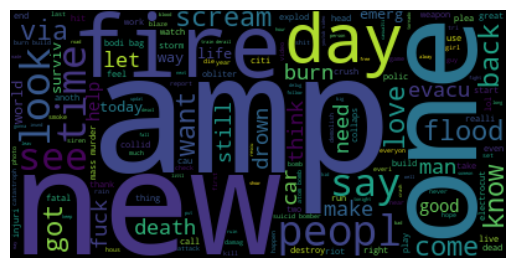

In [15]:
# Analysing common words using WordCloud 

wc = WordCloud(background_color='black')
wc.generate(' '.join(train['Cleaned_text']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

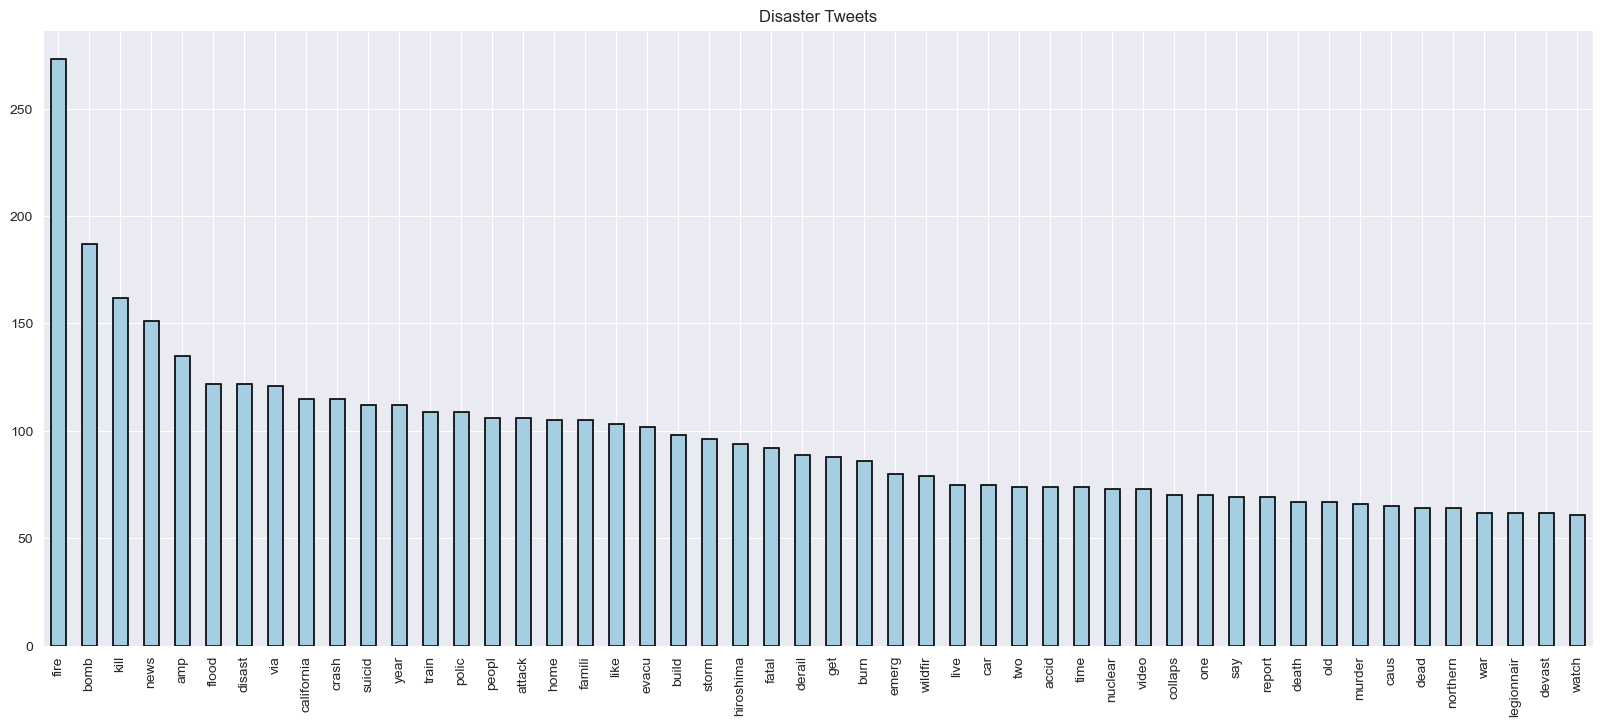

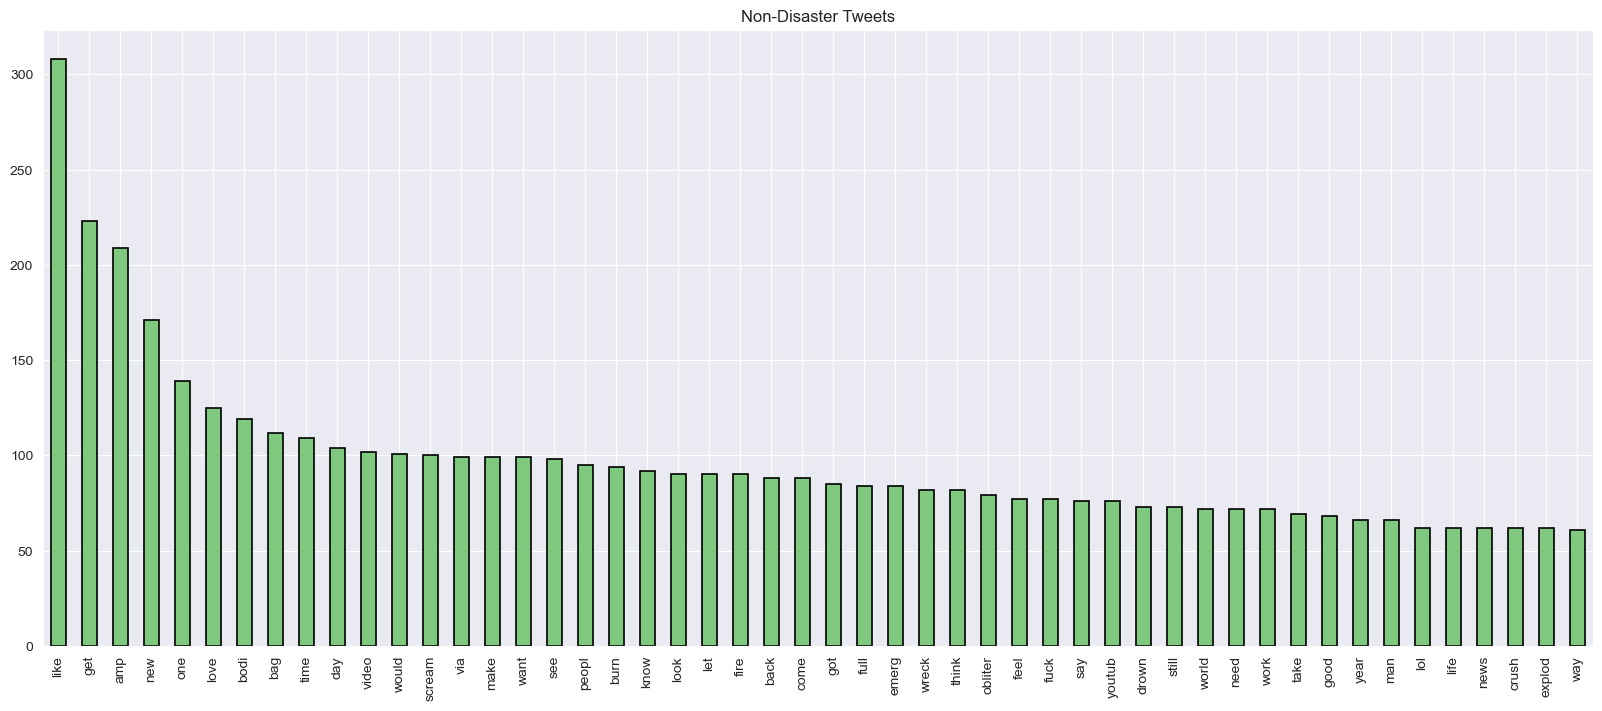

In [16]:
# Analysing top 50 words in training data

disaster_tweet = train[train.target==1]["Cleaned_text"]
non_disaster_tweet = train[train.target==0]["Cleaned_text"]

color = ['Paired','Accent']
splitedData = [disaster_tweet,non_disaster_tweet]
title = ["Disaster Tweets", "Non-Disaster Tweets"]
for item in range(2):
    plt.figure(figsize=(20,8))
    plt.title(title[item],fontsize=12)
    pd.Series(' '.join([i for i in splitedData[item]]).split()).value_counts().head(50).plot(kind='bar',fontsize=10,colormap=color[item],edgecolor='black', linewidth=1.2)
    plt.show()

In [17]:
common_words = ['via','like','build','get','would','one','two','feel','lol','fuck','take','way','may','first','latest'
                'want','make','back','see','know','let','look','come','got','still','say','think','great','pleas','amp']

def text_cleaning(data):
    return ' '.join(i for i in data.split() if i not in common_words)

train["Cleaned_text"] = train["Cleaned_text"].apply(text_cleaning)
test["Cleaned_text"] = test["Cleaned_text"].apply(text_cleaning)

In [18]:
#Converting to list
text = train["Cleaned_text"].tolist()
text_test = test["Cleaned_text"].tolist()
text[:3] # Analysing first 3 sentence in train data.

['deed reason earthquak allah forgiv',
 'forest fire near rong sask canada',
 'resid ask shelter place notifi offic evacu shelter place order expect']

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
token = Tokenizer()
token.fit_on_texts(text)

In [20]:
# Finding the vocab size
vocab_size = len(token.word_index)+1
print("The vocabulary size is : {}".format(vocab_size))

The vocabulary size is : 12688


In [21]:
# Encoding tokens in words to numerical formats

encoded_text = token.texts_to_sequences(text)
encoded_text_test = token.texts_to_sequences(text_test)
encoded_text[:2]

[[3492, 430, 182, 1285, 2785], [110, 1, 153, 5026, 5027, 982]]

In [22]:
#Considering 120 words
max_length = 120 # Considering top 120 tokens.
X = pad_sequences(encoded_text,maxlen=max_length,padding='post') # This is done to make the sequence of same length.
X_test = pad_sequences(encoded_text_test,maxlen=max_length,padding='post')
X

array([[3492,  430,  182, ...,    0,    0,    0],
       [ 110,    1,  153, ...,    0,    0,    0],
       [1286,  481, 1570, ...,    0,    0,    0],
       ...,
       [ 580,  378, 1276, ...,    0,    0,    0],
       [  21,  141, 1877, ...,    0,    0,    0],
       [ 142,   19,  361, ...,    0,    0,    0]], dtype=int32)

In [23]:
%%time
#declaring dict to store all the words as keys in the dictionary and their vector representations as values
glove_vectors = dict()

# Now, we will convert the words in glove vectors into key value pairs. We have used glove representation of 200D. 


file = open('glove.6B.200d.txt',encoding='utf-8')

for line in file:
    values = line.split()  # contains list of keys and their vectors
    word = values[0] # contains words
    vectors = np.asarray(values[1:]) # storing vectors
    glove_vectors[word] = vectors #storing the vector representation of the respective word in the dictionary
file.close()

CPU times: user 19.9 s, sys: 1.1 s, total: 21 s
Wall time: 23 s


In [24]:
# Now we are creating a matrix for the tokens which we are having in our dataset and then storing their vector representation values in the matrix if it matches with glove_vectors words else print the misspelled words or words which are not present.

word_vector_matrix = np.zeros((vocab_size,200))  # size of the word matrix
for word,index in token.word_index.items():
    vector = glove_vectors.get(word)
    if vector is not None:
        word_vector_matrix[index] = vector
    #else:
        #print(word)

In [25]:
# Dividing the data into training, validation and testing
from sklearn.model_selection import train_test_split
# for bow and tf-idf
#x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.1, random_state=42, stratify = y_final)
#X_train, x_valid, Y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42, stratify = y_train)
#x_test_final = x_test_final

#  for Word Embeddings
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify = y)
X_train, x_valid, Y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42, stratify = y_train)
#x_test_final = x_test_final

In [26]:
from keras.optimizers import Adam,SGD
from tensorflow.keras import regularizers

embedding_feature_vector = 200 # Since we used glove vector embedding of dim 200.
model = Sequential()
model.add(Embedding(vocab_size,embedding_feature_vector,input_length=max_length,weights = [word_vector_matrix], trainable = False))
model.add(Dropout(0.35))
model.add(LSTM(200))
model.add(Dropout(0.35))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-4),metrics=['accuracy'])
print(model.summary())

2024-01-30 20:03:56.347589: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 200)          2537600   
                                                                 
 dropout (Dropout)           (None, 120, 200)          0         
                                                                 
 lstm (LSTM)                 (None, 200)               320800    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense (Dense)               (None, 32)                6432      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,864,865
Trainable params: 327,265
Non-tr

In [27]:
from tensorflow.keras.callbacks import *
n_epoch = 30

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, 
                           mode='min', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, 
                              verbose=1, mode='min')

In [28]:
# Training the model
history = model.fit(X_train,Y_train,validation_data=(x_valid,y_valid),callbacks=[reduce_lr,early_stop],epochs=n_epoch,batch_size= 64)

Epoch 1/30
97/97 [==============================] - 24s 232ms/step - loss: 0.6873 - accuracy: 0.5703 - val_loss: 0.6841 - val_accuracy: 0.5700 - lr: 1.0000e-04
Epoch 2/30
97/97 [==============================] - 30s 309ms/step - loss: 0.6837 - accuracy: 0.5703 - val_loss: 0.6827 - val_accuracy: 0.5700 - lr: 1.0000e-04
Epoch 3/30
97/97 [==============================] - 19s 198ms/step - loss: 0.5878 - accuracy: 0.7118 - val_loss: 0.5253 - val_accuracy: 0.7930 - lr: 1.0000e-04
Epoch 4/30
97/97 [==============================] - 27s 282ms/step - loss: 0.5278 - accuracy: 0.7573 - val_loss: 0.4813 - val_accuracy: 0.7872 - lr: 1.0000e-04
Epoch 5/30
97/97 [==============================] - 27s 277ms/step - loss: 0.5156 - accuracy: 0.7653 - val_loss: 0.4832 - val_accuracy: 0.7857 - lr: 1.0000e-04
Epoch 6/30
97/97 [==============================] - 29s 304ms/step - loss: 0.5085 - accuracy: 0.7689 - val_loss: 0.4662 - val_accuracy: 0.7915 - lr: 1.0000e-04
Epoch 7/30
97/97 [======================

In [31]:
predictions = model.predict(x_test).round()
cr = classification_report(y_test,predictions)
print(cr)

24/24 [==============================] - 1s 44ms/step
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       435
           1       0.80      0.73      0.76       327

    accuracy                           0.80       762
   macro avg       0.80      0.80      0.80       762
weighted avg       0.80      0.80      0.80       762


In [34]:
# Making Predictions on test data
predictions_test = pd.DataFrame(model.predict(X_test).round().astype('int'))
test_id = pd.DataFrame(test["id"])
submission = pd.concat([test_id,predictions_test],axis=1)
submission.columns = ["id","target"]
submission.to_csv("Submission.csv",index=False)

102/102 [==============================] - 5s 48ms/step
